In [1]:
import math

In [2]:
class StandardScaler:

    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, data):
        """
        Calculates mean and Standard deviation

        Parameters :
        data : Array-like structure 

        Return : None
        """

        n = len(data)

        # mean
        self.mean = sum(data)/n

        # sqaured deviation
        squared_deviation = [(x - self.mean )**2 for x in data ] 

        #standard deviation
        self.std = math.sqrt( sum(squared_deviation) / n)  

    def fit_transform(self,data):
        """
        Returns Scaled data , mean is 0 and standard deviation is 1

        Parameters :
        data : Array-like structure 
        """
        #fit method to ensure mean and std values are up to date
        self.fit(data)
        
        # list to store scaled data
        
        scaled = list()

        # checking standard deviation is zero
        if self.std == 0:
            raise ValueError("Standard Deviation is Zero !!! Data Cannot be scaled !!!")

        # scaling the data
        for x in data:
            z = (x - self.mean )/self.std
            scaled.append(z)
        
        return scaled

    def inverse_transform(self,scaled_data):
        """
        Reverts Scaled data back to original

        Parameters:
        scaled_data : Array-like data structure 

        Return :
        list : original data
        """

        original_data = [(z*self.std + self.mean) for z in scaled_data]

        return original_data

In [3]:
data = [4.2 , 4.8 , 5.1 , 4, 6.1 ,6.0, 5.5 , 4.6 , 5.4, 6.5,4.4 , 5.8 , 5.3]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

print(scaled_data)

[-1.3494402411171642, -0.5459567387725935, -0.1442149876003083, -1.6172680752320214, 1.1949241829739767, 1.0610102659165488, 0.3914406806294062, -0.8137845728874508, 0.2575267635719782, 1.7305798512036912, -1.0816124070023068, 0.7931824318016915, 0.12361284651454894]


In [4]:
def pdf(scaled_data):
    """
    Return Probability density for normal distribution
    Parameters:
    data : Array like data structure
    Return :
    list : probability density list
    """
    p = [(math.exp(-z**2/2))/math.sqrt(2*math.pi) for z in scaled_data]

    return p

In [5]:
p = pdf(scaled_data)
print(p)

[0.1605045455903597, 0.3437045305513043, 0.3948151830736407, 0.10788207497563196, 0.19536993116059306, 0.22722605377712196, 0.36951962177035147, 0.28648726366427807, 0.3859302790006095, 0.08924304005852073, 0.22226581851608246, 0.29126909376370286, 0.395905947948756]


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

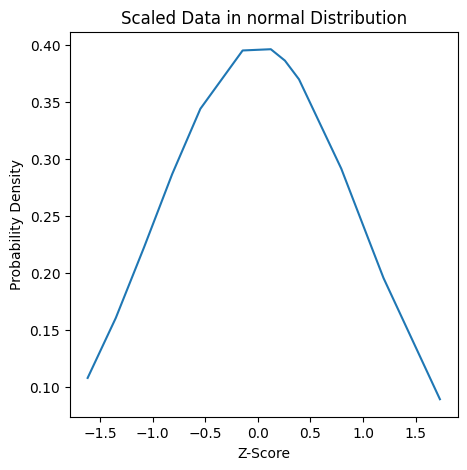

In [7]:
fig = plt.figure(figsize=(5,5))
sns.lineplot(x=scaled_data,y=p)
plt.title("Scaled Data in normal Distribution")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.show()